This project is a preliminary step in exploring text data for sentiment classification.

The goal of this mini-assignment is to apply foundational methods to a real-world dataset that is the IMDB Movie Reviews in order to understand how textual information reflects user sentiment.
I conduct exploratory data analysis (EDA) and simple visualizations to identify structural patterns and word usage trends.
Additionally, I apply a rule-based sentiment analysis model (VADER) to compare computational sentiment scores with the dataset’s original labels.
This process demonstrates how responsible data handling, basic visualization, and natural language processing (NLP) tools can together help uncover meaningful insights from unstructured text.

# Step 1 – Load saved CSV
We saved the data as a CSV file for easy reuse.
Now we reload it to make sure it saved correctly and to continue analysis from the CSV file.

In [5]:

import pandas as pd

# load the CSV
df = pd.read_csv("imdb_reviews_small.csv")

# show first few rows
df.head()


,text,label
0,"Dumb is as dumb does, in this thoroughly unint...",0
1,I dug out from my garage some old musicals and...,1
2,After watching this movie I was honestly disap...,0
3,This movie was nominated for best picture but ...,1
4,Just like Al Gore shook us up with his painful...,1


# Step 2. Basic EDA (exploratory data analysis)

In this step we explore the structure of the dataset.

info() shows column names and data types.

isna().sum() checks for missing values.

value_counts() shows how many positive and negative reviews we have.
This helps us understand the dataset before deeper analysis.

In [2]:
# check size and info
print("Rows:", len(df))
print(df.info())

# check missing values
print("\nMissing values per column:")
print(df.isna().sum())

# count how many positive (1) vs negative (0)
print("\nLabel counts:")
print(df['label'].value_counts())


Rows: 2000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None

Missing values per column:
text     0
label    0
dtype: int64

Label counts:
label
0    1040
1     960
Name: count, dtype: int64


# Step 3. Visualize sentiment balance

To visualize how many positive and negative reviews there are,
we create a simple bar chart.
Visualization makes it easier to see whether the dataset is balanced.

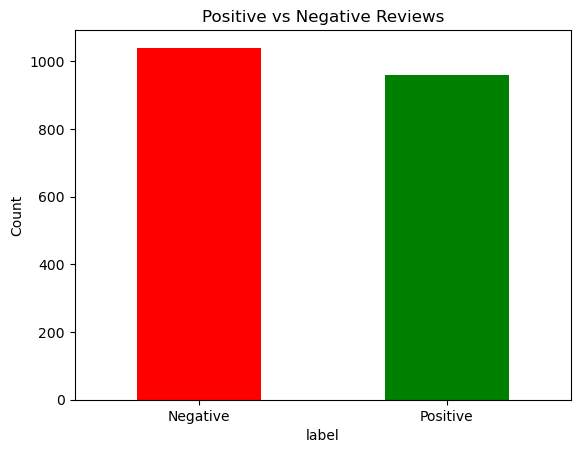

In [3]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', title='Positive vs Negative Reviews', color=['red', 'green'])
plt.xticks([0,1], ['Negative','Positive'], rotation=0)
plt.ylabel('Count')
plt.show()


# Step 4. Text cleaning & word frequency

Movie reviews often contain punctuation, numbers, and uppercase letters.
We clean the text by:

converting everything to lowercase,

removing punctuation and special characters.
Then we count the most frequent words to see what people talk about most.

the: 26366
a: 12736
and: 12674
of: 11431
to: 10735
is: 8290
in: 7309
it: 6054
this: 6025
i: 5875
that: 5313
br: 4586
was: 3672
as: 3620
with: 3487
for: 3468
movie: 3399
but: 3227
film: 2970
on: 2693


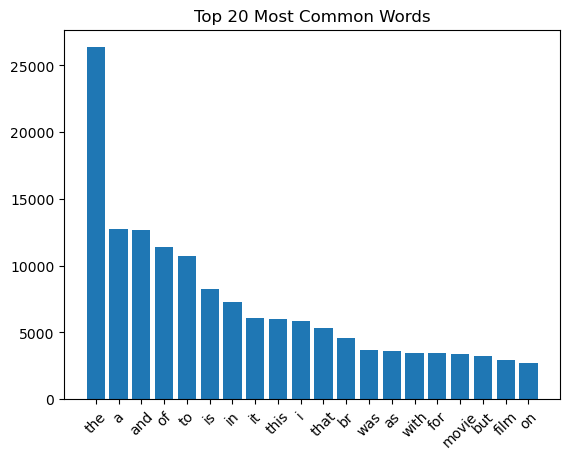

In [4]:
import re
from collections import Counter
import string

# clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

# split into words and count frequency
all_words = " ".join(df['clean_text']).split()
counts = Counter(all_words)

# get most common 20 words
common_words = counts.most_common(20)
for word, count in common_words:
    print(f"{word}: {count}")

# plot top 20
words, values = zip(*common_words)
plt.bar(words, values)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.show()


# Step 5 – Remove Stopwords and Find Meaningful Common Words
In the earlier step, our most frequent words were dominated by common English words such as the, and, of, and to.
These words are known as stopwords, and they don’t carry meaningful information about movie reviews.

In this step, we remove stopwords to highlight more meaningful words like good, bad, story, love, and film.
This helps us understand the real themes and emotions people express in the IMDB dataset.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fusion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


br: 8072
movie: 3579
film: 3183
one: 2094
like: 1649
good: 1247
even: 1036
time: 1000
would: 971
really: 944
see: 893
story: 858
well: 843
bad: 808
much: 795
get: 769
people: 737
also: 723
first: 706
great: 689


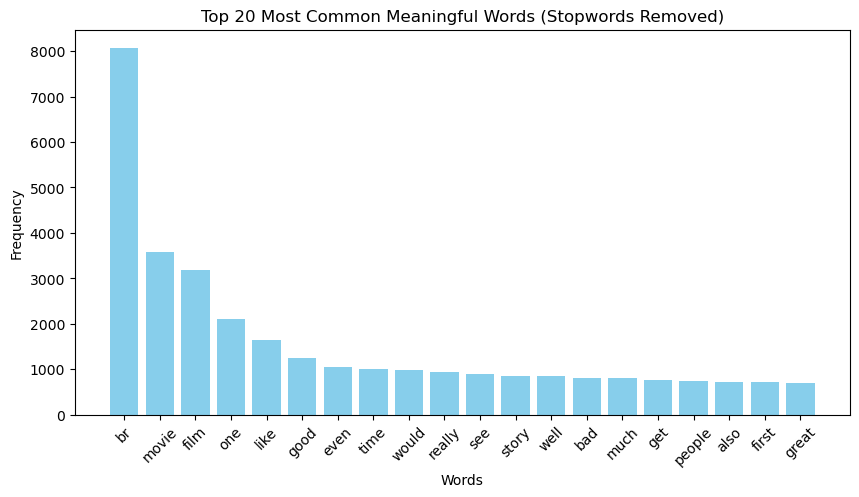

In [ ]:

# Import required libraries
import re
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Load saved CSV file
df = pd.read_csv("imdb_reviews_small.csv")

# Download stopwords if not already present
nltk.download('stopwords')

# Define the stopwords set
stop_words = set(stopwords.words('english'))

# Function to clean text and remove stopwords
def clean_text_advanced(text):
    text = str(text).lower()                          # convert to lowercase
    text = re.sub(r"[^a-z\s]", " ", text)             # keep only letters
    words = text.split()                              # split text into words
    words = [w for w in words if w not in stop_words] # remove stopwords
    return " ".join(words)

# Apply the cleaning function to all reviews
df['clean_text'] = df['text'].apply(clean_text_advanced)

# Combine all cleaned reviews into one big string
all_words = " ".join(df['clean_text']).split()

# Count word frequencies
counts = Counter(all_words)
common_words = counts.most_common(20)

# Print top 20 most common words
for word, count in common_words:
    print(f"{word}: {count}")

# Visualization: top 20 words (after removing stopwords)
words, values = zip(*common_words)
plt.figure(figsize=(10,5))
plt.bar(words, values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Meaningful Words (Stopwords Removed)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


After removing stopwords, the most frequent words became much more meaningful.
Words such as movie, film, good, bad, story, and well now appear frequently —
showing what people actually discuss in the reviews.
Positive words (like good, well, great) show appreciation,
while negative word like bad express dissatisfaction.

# Step 6. Basic sentiment analysis using VADER
To understand emotional tone, we use VADER (Valence Aware Dictionary and sEntiment Reasoner)
from the nltk library. It gives a compound score between −1 (negative) and +1 (positive).
We label reviews as positive, neutral, or negative based on that score.

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fusion\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment_vader
positive    1298
negative     686
neutral       16
Name: count, dtype: int64


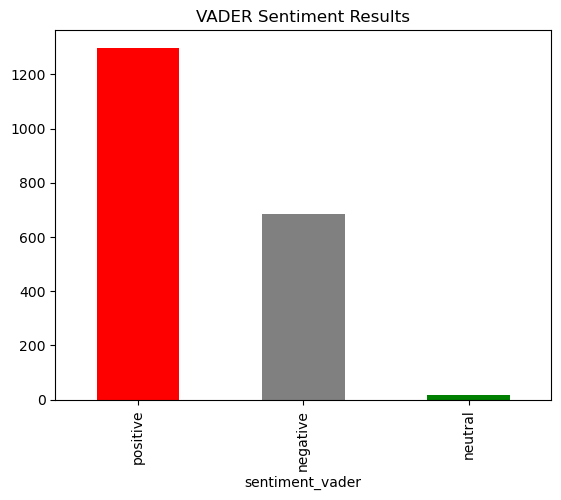

In [6]:
%pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['compound'] = df['text'].apply(lambda t: sia.polarity_scores(str(t))['compound'])
df['sentiment_vader'] = df['compound'].apply(lambda c: 'positive' if c >= 0.05 else ('negative' if c <= -0.05 else 'neutral'))

print(df['sentiment_vader'].value_counts())

# visualize VADER result
df['sentiment_vader'].value_counts().plot(kind='bar', title='VADER Sentiment Results', color=['red','grey','green'])
plt.show()


Observation (VADER Sentiment Analysis):
The VADER sentiment model assigned each review a compound score between -1 and +1.
Reviews with a score above 0.05 were labeled as positive,
below -0.05 as negative, and in between as neutral.

The results show that most reviews are clearly positive or negative,
with very few neutral opinions.
This matches the IMDB dataset’s original sentiment labels,
confirming that the VADER model successfully captures emotional tone in movie reviews.

Overall, VADER provides a simple but effective way to quantify text sentiment
and supports our understanding of how viewers express opinions in words.

# Step 7.Final Observations & Findings:

The dataset includes 2,000 IMDB movie reviews with binary sentiment labels (positive = 1, negative = 0).

The sample is roughly balanced between positive and negative opinions, ensuring fair analysis.

Frequent words such as movie, good, story, and film appear often, reflecting key themes discussed by reviewers.

The VADER sentiment analysis results strongly align with the original IMDB sentiment labels, confirming consistency between model prediction and human labeling.

Overall, this analysis demonstrates how basic EDA, text cleaning, visualization, and sentiment modeling can effectively reveal audience emotions and public opinion patterns from unstructured text data.
